<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## _*Getting Started with Qiskit Terra_ 

The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
#### Contributors
Jay Gambetta[1], Ismael Faro[1], Andrew Cross[1], Ali Javadi[1]

#### Affiliation
* [1] IBM Q* 

First let's start by importing some basic features of Qiskit Terra.

In [1]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute 

The basic concept of Qiskit Terra is an array of quantum circuits. The workflow consists of two stages: Build, and Execute. Build allows you to make different quantum circuits that represent the problem you are solving; Execute allows you to run them on different backends.  After the jobs have been run, the data is collected. There are methods for putting this data together, depending on the program. This either gives you the answer you wanted, or allows you to make a better program for the next instance.

## Building the circuit <a id='sectionB'></a>

The basic elements needed for your first program are the QuantumCircuit, and QuantumRegister.

In [2]:
# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3, 'q')

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q)

**Note**: Naming the `QuantumRegister` is optional and not required.
    

After you create the circuit with its registers, you can add gates to manipulate the registers. As you proceed through the documentation you will find more gates and circuits but the below is an example of a quantum circuit that makes a GHZ state, $(|000>+|111>)/\sqrt{2}$. The circuit that does this consists of a quantum register of three qubits and a gate 
sequence $H$ on qubit 0 (making a superposition), followed by $C_X$ between qubit 0 and 1 and a $C_X$ between qubit 0 and 2. In Qiskit Terra this is done using

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(q[0], q[1])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(q[0], q[2])

## Visualize Circuit

You can visualize your circuit using Qiskit Terra `circuit_drawer`, which plots circuit in the form found in many textbooks.

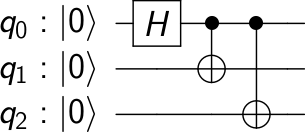

In [4]:
from qiskit.tools.visualization import circuit_drawer

circuit_drawer(circ)

## Qiskit Aer Statevector backend


In Qiskit Aer we have many simulator backends that allow the simulation of quantum circuits. 
The most common is the `statevector_simulator`. This simulator returns the quantum 
state which is a complex vector of dimensions $2^n$ where $n$ is the number of qubits 
(so be careful using this as it will quickly get too large to run on your machine).

**Note**

The tensor order used in qiskit goes $Q_n\otimes \cdots  \otimes  Q_1\otimes Q_0$ which is not the standard used in many physics textbooks and results is the $C_X$ between the control qubit 0 and target qubit 1 having the form 

$$C_X = \begin{pmatrix} 1 & 0 & 0 & 0 \\  0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\\end{pmatrix}$$


To run the above circuit using the statevector simulator first you need to import Aer and then set the backend to `statevector_simulator`.

In [5]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

Now we have chosen the backend its time to compile and run the quantum circuit. In Qiskit Terra we provide the execute function for this which returns a job object

```
execute(name_of_circuits=None, backend=backend, config=None, basis_gates=None, coupling_map=None, initial_layout=None, shots=1024, max_credits=3, seed=None, qobj_id=None, hpc=None, skip_translation=False)
```

(**Note**: You can obtain the above parameters in Jupyter. Simply place the text cursor on a function and press Shift+Tab)

In [6]:
# Create a Quantum Program for execution 
job = execute(circ, backend)

When you run a program a job object is made that has the following two useful methods

```
job.status()
```
returns the status of the job

```
job.result()
``` 
returns the job result object.

(**Note**: Jobs run asynchronous but when the result method is called it switches to synchronous and waits for it to finish before moving on to another task). 

In [7]:
result = job.result()

The results object contains the data and Qiskit Terra provides the method 

```
result.get_statevector(circ)
```
to return the statevector for circuit `circ`.

In [8]:
outputstate = result.get_statevector(circ)
print("simulation: ", result )
print(np.around(outputstate,3))

simulation:  COMPLETED
[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


Qiskit Terra also provides a visualization toolbox to allow you to view these results.

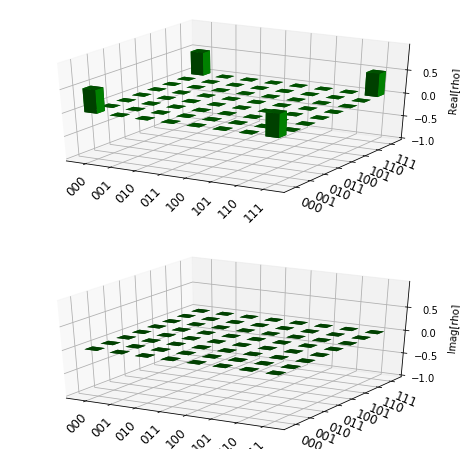

In [9]:
from qiskit.tools.visualization import plot_state
plot_state(outputstate)

## Qiskit Aer Unitary backend

Qiskit Aer also includes a `unitary_simulator` that works provided all the elements in the circuit are unitary operations. This backend 
calculates the $2^n \times 2^n$ matrix representing the gates in the quantum circuit. 

In [10]:
 # Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Show the results
print("simulation: ", result )
print(np.around(result.get_unitary(circ), 3))

simulation:  COMPLETED
[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


## Qiskit Aer OpenQASM backend

The above while useful for understanding a quantum circuit scales exponential with the number of qubits and as such is not physical (cannot be obtained from a single shot in a real quantum experiment). In a real device we need
to have a measurement otherwise no information is extracted from the quantum computer and the above is simply internal representations. The measurements cause the quantum system to collapse into classical bits. 
For example, when independent measurements are made on each qubit the GHZ state $(|000>+|111>)/\sqrt{2}$. 
will collapse into either $|000>$ or $|111>$ with equal probability. 

To see this, we can make a second circuit representing the measurements and use the addion operation to add these circuits together. 

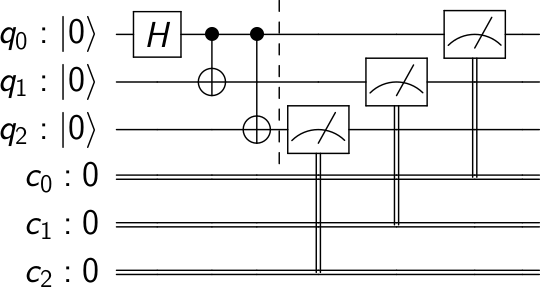

In [11]:
# Create a Classical Register with 3 bits.
c = ClassicalRegister(3, 'c')
# Create a Quantum Circuit
meas = QuantumCircuit(q, c)
meas.barrier(q)
# map the quantum measurement to the classical bits
meas.measure(q,c)

# combining the circuits
qc = circ+meas

#drawing the circuit
circuit_drawer(qc)

This circuit consists of an additional classical register and three measurements that are used to map the outcome of qubits to this classical bits. 

**Note**: The classical bits are ordered so that the MSB is to the left and the LSB is to the right.
This is the standard binary sequence order. For example in 01 the MSB is 0 and the LSB is 1 and is why in Qiskit we use the non-standard tensor product order.
 
To simulate this circuit Qiskit Aer has a `qasm_simulator` which is designed to mimic an ideal quantum device.

In [12]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim)
result_sim = job_sim.result()

Once you have a result object you can access the counts via the function 

```get_counts(circuit)```. 

This gives you the binary outcomes of the circuit you have run.

In [13]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 516, '111': 508}


Here we see that approximately 50 percent of the time it is in the 000 state and 111. Qiskit Terra also provides a function `plot_histogram` which allows you to view the outcomes. 

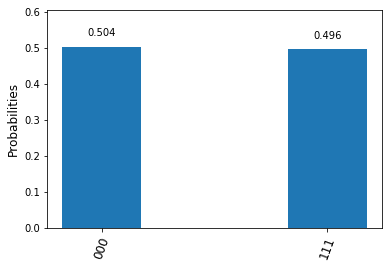

In [14]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

## Execute on a Real IBMQ Device

This is the important part of Qiskit. You can use it to run your circuits on real quantum computers using the IBMQ provider. They are small and noisy but are advancing at a fast pace. In the next section we will go into more details about the provider but for now we will outline the basic functions. 

To access IBMQ devices, you'll need an API token. For the public IBM Q devices, you can generate an API token [here](https://quantumexperience.ng.bluemix.net/qx/account/advanced) (create an account if you don't already have one). For Q Network devices, login to the q-console, click your hub, group, and project, and expand "Get Access" to generate your API token and access url.

In [15]:
from qiskit import IBMQ

After generating your API token, call,

`IBMQ.save_account('MY_TOKEN')`

For Q Network users, you'll also need to include your access url:

`IBMQ.save_account('MY_TOKEN', 'URL')`

This will store your IBMQ credentials in a local file.  Unless your registration information has changed, you only need to do this once.  You may now load your accounts by calling,

In [16]:
IBMQ.load_accounts()

Now view the list of backends available to you.

In [17]:
print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

We now choose a device with the least busy queue which can support our program (has at least 3 qubits).

In [18]:
from qiskit.backends.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] > 3 and
                                                       not x.configuration()['simulator'])
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmqx4


In [19]:
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)

In [20]:
result_exp = job_exp.result()

Like before, the counts from the execution can be obtained using ```get_counts(circuit)``` 

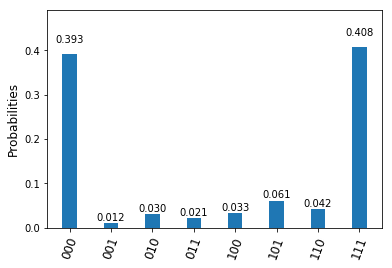

In [21]:
counts_exp = result_exp.get_counts(qc)
plot_histogram(counts_exp)

## Execute on Remote IBMQ HPC Simulator

The IBMQ provider also comes with a remote optimized simulator called ``ibmq_qasm_simulator``. This remote simulator is capable of simulating up to 32 qubits. It can be used the 
same way as the remote real backends. 

In [22]:
backend = IBMQ.get_backend('ibmq_qasm_simulator')

In [23]:
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_hpc = execute(qc, backend=backend, shots=shots, max_credits=max_credits)

In [24]:
result_hpc = job_hpc.result()

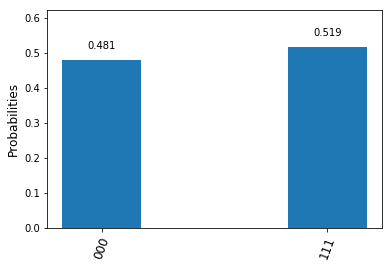

In [25]:
counts_hpc = result_hpc.get_counts(qc)
plot_histogram(counts_hpc)

## Retrieving a previously ran job

If your experiment takes longer to run then you have time to wait around, or if you simply want to retrieve old jobs back, the IBMQ backends allow you to do that.
First you would need to save your job's ID:

In [26]:
jobID = job_exp.job_id()

print('JOB ID: {}'.format(jobID))        

JOB ID: 5be748a7e00f60005ad7f23d


Given a job ID, that job object can be later reconstructed from the backend using retrieve_job:

In [27]:
job_get=backend.retrieve_job(jobID)

and then the results can be obtained from the new job object. 

In [28]:
job_get.result().get_counts(qc)

{'00000': 402,
 '00001': 12,
 '00010': 31,
 '00011': 22,
 '00100': 34,
 '00101': 62,
 '00110': 43,
 '00111': 418}